In [1]:
import pandas as pd

df = pd.read_csv ('discordMessages.csv')

print(df)

                 AuthorID                       Author                Date  \
0      423844039121436673          KapitanDrabina#1513  30-Jun-18 12:52 PM   
1      305677024855457805       Pokój Wytrzeźwień#2137  30-Jun-18 04:22 PM   
2      423844039121436673          KapitanDrabina#1513  30-Jun-18 04:23 PM   
3      305677024855457805       Pokój Wytrzeźwień#2137  30-Jun-18 05:14 PM   
4      423844039121436673          KapitanDrabina#1513  30-Jun-18 05:14 PM   
...                   ...                          ...                 ...   
75628  130029607603666944                     Fee#1290  31-May-22 02:56 PM   
75629  130029607603666944                     Fee#1290  31-May-22 02:56 PM   
75630  206047147588583424  Prussian From The Moon#6892  31-May-22 03:17 PM   
75631  130029607603666944                     Fee#1290  31-May-22 03:17 PM   
75632  466036283332886528                 PixPire#9992  31-May-22 08:19 PM   

                                 Content Attachments Reactions 

In [20]:
df2 = df.groupby('AuthorID')[['Date']].count()
df2.sort_values('Date', ascending=False, inplace=True)

print(df2)

                     Date
AuthorID                 
462739739531804674  18442
310854643582238722  15361
423844039121436673  14989
466036283332886528   9103
515945693903454213   5828
130029607603666944   5100
515955106798370817   1213
604755973550112768   1180
294214832704585728   1139
235088799074484224    671
206047147588583424    581
581518783236014103    536
305677024855457805    259
503190912705363971    221
484791877439324161    174
243146252831686656    159
477918243559047184    156
461361233644355595     90
354712509195878404     70
526871902921162762     58
479014229505212442     46
723301446283690046     37
159985870458322944     28
364036462221459456     24
293888622061682689     23
169863012503650304     21
703735976371028050     20
361569267927482370     17
232243138922676225     15
394565133659013132     14
401412300323684354      9
477005835784945674      6
471757795465625621      5
472847445194178581      5
479257538521464843      4
585935390322589699      3
448934033263

In [2]:
df2 = df.groupby('Author')[['Date']].count()
df2.sort_values('Date', ascending=False, inplace=True)

print(df2)

                                 Date
Author                               
Mr. P#7657                      18442
Christopher Quack#8078          15361
KapitanDrabina#1513             14989
PixPire#9992                     9103
Dameredet#0958                   5828
Fee#1290                         5100
Admirał RoboMurlok#0850          1213
Inquisitor#9410                  1180
Ziemniaczek#0878                 1139
Rythm#3722                        671
Prussian From The Moon#6892       581
Zander#1732                       536
Pokój Wytrzeźwień#2137            259
Krychol#6591                      221
MaciejDużyKot#4929                174
Raphaël Ambrosius Costeau#4990    159
Gruby Harry#3989                  156
Roast-Bot#0168                     90
DoubleYou#7771                     70
Euler#5212                         58
czarnykaloryferr#9835              46
lord model#8403                    37
MEE6#4876                          28
PoMcZsZe#6365                      24
MieczMaNn#74

In [4]:
df_without_nan = df

for i in df_without_nan.index:
    cont = df_without_nan.loc[i, 'Content']
    if cont != cont:
        df_without_nan.loc[i, 'Content'] = 'NaN'

In [5]:
df4 = df_without_nan[(df_without_nan['Content'].str.contains('kurwa'))]

df_kurwa = df4.groupby('Author')[['Date']].count()
df_kurwa.sort_values('Date', ascending=False, inplace=True)

print(df_kurwa)

# for i in df4.index:
#     print(df4.loc[i, 'Author'])
#     print(df4.loc[i, 'Content'])

                        Date
Author                      
Christopher Quack#8078    37
Fee#1290                  18
KapitanDrabina#1513       14
Inquisitor#9410           11
Dameredet#0958             7
Mr. P#7657                 4
Pokój Wytrzeźwień#2137     2
Ziemniaczek#0878           2
Krychol#6591               1
MieczMaNn#7483             1


In [6]:
df_fck = df_without_nan[(df_without_nan['Content'].str.contains('jednego'))]

df_fck = df_fck.groupby('Author')[['Date']].count()
df_fck.sort_values('Date', ascending=False, inplace=True)

print(df_fck)

                         Date
Author                       
KapitanDrabina#1513        75
Christopher Quack#8078     67
Mr. P#7657                 48
Dameredet#0958             20
PixPire#9992               15
Admirał RoboMurlok#0850     2
Fee#1290                    2
Inquisitor#9410             2
Ziemniaczek#0878            2
MaciejDużyKot#4929          1


Pix

In [16]:
df_pix = df_without_nan[(df_without_nan['Author'].str.contains('KapitanDrabina'))]
pix_as_text = ""

for i in df_pix.index:
    pix_as_text += df_pix.loc[i, 'Content']

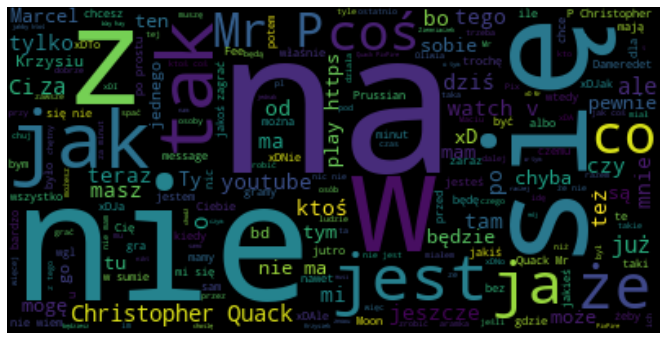

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(pix_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()